# Luiz Henrique dos Santos Faleiros
# Gu - 3003825

In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, confusion_matrix


Importar iris

In [110]:
iris = sns.load_dataset('iris')

In [111]:
iris.dropna(inplace=True)

In [112]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [113]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [114]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Realize a analise exploratória dos dados ;

Text(0.5, 0, 'Species')

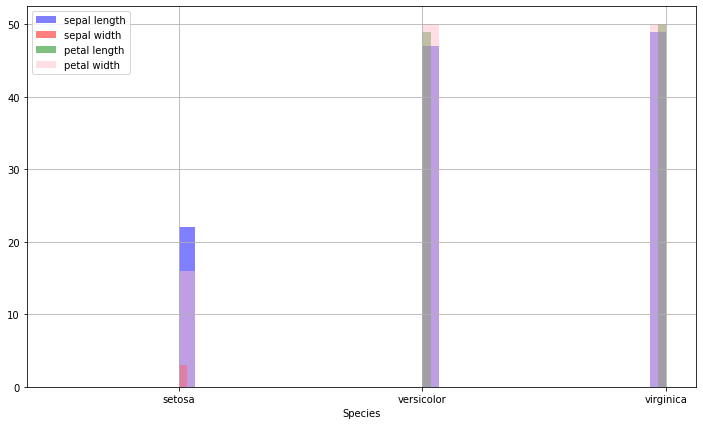

In [115]:
plt.figure(figsize=(12,7))
iris[iris['sepal_length']> 5]['species'].hist(alpha=0.5, color='blue', bins=30, label="sepal length")
iris[iris['sepal_width'] > 4]['species'].hist(alpha=0.5, color='red', bins=30, label="sepal width")
iris[iris['petal_length'] > 3]['species'].hist(alpha=0.5, color='green', bins=30, label="petal length")
iris[iris['petal_width'] > 0.2]['species'].hist(alpha=0.5, color='pink', bins=30, label="petal width")
plt.legend()
plt.xlabel('Species')


Divida os dados em conjunto de treinamento e teste

In [116]:
X = iris[['sepal_length', 'sepal_width', 'petal_length',
               'petal_width']]
y = iris['species']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Crie o modelo de Arvore de Decisão

In [118]:
obtem_species = ['species']

In [119]:
final_data = pd.get_dummies(iris,columns=obtem_species, drop_first=True)

In [120]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species_versicolor  150 non-null    uint8  
 5   species_virginica   150 non-null    uint8  
dtypes: float64(4), uint8(2)
memory usage: 6.2 KB


In [121]:
X = final_data.drop('species_versicolor',axis=1)
y = final_data['species_versicolor']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [123]:
dtree = DecisionTreeClassifier()

In [124]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [125]:
pred = dtree.predict(X_test)

Visualize a Arvore de Decisão;

In [126]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Analise o modelo preditor obtido utilizado um relatório de classificação e uma matriz de confusão

In [127]:
print(confusion_matrix(y_test,pred))

[[34  0]
 [ 0 26]]


Crie uma Floresta Aleatória

In [128]:
rfc = RandomForestClassifier(n_estimators=500)

In [129]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [130]:
rpred = rfc.predict(X_test)

In [131]:
print(classification_report(y_test, rpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [132]:
print(confusion_matrix(y_test,rpred))

[[34  0]
 [ 0 26]]
